In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## Import the data set

In [38]:
bank_data=pd.read_csv("C:\\Users\\jhishna2022\\OneDrive\\Documents\\bank-full-data.csv")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

### To check non null value count and data types

In [39]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### checking for any duplicate row

In [40]:
bank_data[bank_data.duplicated()].shape

(0, 17)

### Transfromations  ----> creating dummy variables

In [41]:
bank_data1 = pd.get_dummies(bank_data,columns = ['job','marital','education','contact','poutcome','month'])
bank_data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
import numpy as np
bank_data1['default']=bank_data1['default'].replace(['yes','no'],[1,0])
bank_data1['housing']=bank_data1['housing'].replace(['yes','no'],[1,0])
bank_data1['loan']=bank_data1['loan'].replace(['yes','no'],[1,0])
bank_data1['y']=bank_data1['y'].replace(['yes','no'],[1,0])

In [47]:
bank_data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,0,0,0,1,0,0


### to check non null value count and to check the index of y variable

In [48]:
bank_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

### divide out data into input and output variables

In [49]:
import pandas as pd
X = pd.concat([bank_data1.iloc[:,0:10],bank_data1.iloc[:,11:]],axis=1)
Y = bank_data1['y']

## Building the model

In [50]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [51]:
classifier.classes_

array([0, 1], dtype=int64)

### Model predictions

In [52]:
import numpy as np
np.set_printoptions(suppress=True)
classifier.predict_proba(X)

array([[0.956076  , 0.043924  ],
       [0.97545968, 0.02454032],
       [0.98193784, 0.01806216],
       ...,
       [0.33111669, 0.66888331],
       [0.92156748, 0.07843252],
       [0.8979188 , 0.1020812 ]])

- 0 = not subscribed a term deposit, 1 = subscribed a term deposit
- The probabilities which are less than 0.5, the model will predict them as 0, means not subscribed a term deposit
- The probabilities which are greater than 0.5, the model will predict them as 1, means subscribed a term deposit

In [53]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


### Model accuracy checking

In [54]:
# Confusion matrix for the model accuracy
y_predicted=classifier.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_predicted)
print(confusion_matrix)

[[39153   769]
 [ 4127  1162]]


In [55]:
((39153+1162)/(39153+769+4127+1162))*100

89.1707770232908

The logistic Regression model is able to predict 89.17 % accurate result

In [56]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(Y,y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



### ROC Curve

Text(0, 0.5, 'True positive Rate')

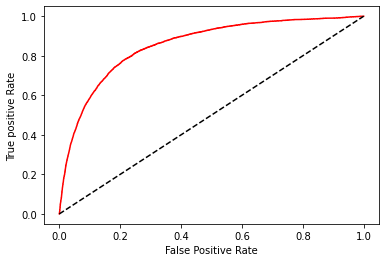

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_predicted)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')


In [58]:
print('auc accuracy is: {} %'.format(round(auc*100,2)))

auc accuracy is: 60.02 %


### Feature Scaling

In [59]:
 from sklearn.preprocessing import StandardScaler

In [60]:
array = X.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

In [61]:
classifier1 = LogisticRegression()
classifier1.fit(rescaledX,Y)

LogisticRegression()

In [62]:
y_pred=classifier1.predict(rescaledX)
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[38942   980]
 [ 3457  1832]]


In [63]:
((38942+1832)/(38942+980+3457+1832))*100

90.18601667735729

### After scaling the data using standard scaler, the accuracy has increased to 90.18 %

auc accuracy  0.6609157047014982


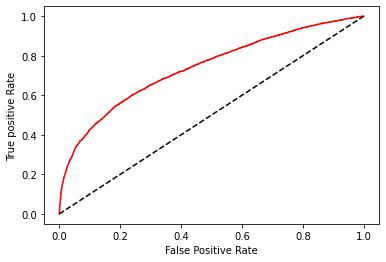

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(rescaledX)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
print('auc accuracy ',auc)